In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
name = '/kaggle/input/courts-dataset/csv/cases/cases_201'
newname = 'cases_201'

durations = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    durations.append(temp)

print(durations)

bignumbers = []

for i in range(34):
    temp = []
    for j in range(9):
        temp.append(0)
    bignumbers.append(temp)

print(bignumbers)

for i in range(9):
    file = name + str(i) + '.csv'
    
    df = pd.read_csv(file)
    
    df = df.dropna(subset = ['date_of_decision'])
    df = df.dropna(subset = ['date_of_filing'])
    
    df = df.reset_index(drop = True)
    
    finalname = newname + str(i) + '.csv'
    newdf.to_csv(finalname)

In [ ]:
temp = pd.read_csv('/kaggle/working/cases_2016.csv')
temp.info()

In [ ]:
name = '/kaggle/working/cases_201'

for i in range(9):
    file = name + str(i) + '.csv'
    
    df = pd.read_csv(file)
    
    df['date_of_filing'] = pd.to_datetime(df['date_of_filing'], format='%Y-%m-%d', errors = 'coerce')
    df['date_of_decision'] = pd.to_datetime(df['date_of_decision'], format='%Y-%m-%d', errors = 'coerce')

    df = df.dropna(subset = ['date_of_decision'])
    df = df.dropna(subset = ['date_of_filing'])
    
    df = df.loc[(df['date_of_decision'] >= '2010-01-01') & (df['date_of_decision'] <= '2023-01-01') & (df['date_of_filing'] >= '2010-01-01') & (df['date_of_filing'] <= '2023-01-01')]
    df = df.reset_index(drop=True)
    
    fullsum = 0
    numbers = 0

    for j in range(1, 34):
        chunk = df.loc[df['state_code'] == j] # has values only for a particular state and a particular year

        smallsum = 0
        smallnumbers = 0

        for k in range(len(chunk)):
            row = chunk.iloc[k]
            delta = row[16] - row[15]
            
            day = delta.days
            smallsum += day
            fullsum += day
            smallnumbers += 1
            numbers += 1

        durations[j][i] = smallsum
        bignumbers[j][i] = smallnumbers
        
        print(smallsum)
        print(smallnumbers)

    durations[0][i] = fullsum
    bignumbers[0][i] = numbers

print(durations)
print(bignumbers)

In [ ]:
print (bignumbers)

In [ ]:
print(durations)

In [ ]:
averages = []
statewise = []

for i in range(1, 34):
    row = []
    temp = 0
    for j in range(9):
        if bignumbers[i][j] != 0:
            val = durations[i][j] / bignumbers[i][j]
        else:
            val = 0
        temp += val
        row.append(val)
    averages.append(row)
    temp = temp / 5
    statewise.append(temp)

print(averages)
print(statewise)

In [17]:
states = pd.read_csv('/kaggle/input/courts-dataset/csv/keys/cases_state_key.csv')
states

,year,state_code,state_name,pc11_state_name,pc11_state_id
0,2018,2,Andhra Pradesh,andhra pradesh,28
1,2011,2,Andhra Pradesh,andhra pradesh,28
2,2011,29,Telangana,andhra pradesh,28
3,2010,29,Telangana,andhra pradesh,28
4,2014,2,Andhra Pradesh,andhra pradesh,28
...,...,...,...,...,...
282,2010,16,West Bengal,west bengal,19
283,2017,16,West Bengal,west bengal,19
284,2013,16,West Bengal,west bengal,19
285,2014,16,West Bengal,west bengal,19


In [18]:
# obtain the number and state thingy cutely 
state = {}

for i in range(len(states)):
    row = states.iloc[i]
    code = row[1]
    if code not in state.keys():
        state[code] = row[2]

print(state)

{2: 'Andhra Pradesh', 29: 'Telangana', 6: 'Assam', 8: 'Bihar', 27: 'Chandigarh', 18: 'Chhattisgarh', 32: 'DNH at Silvasa', 31: 'Diu and Daman', 30: 'Goa', 17: 'Gujarat', 14: 'Haryana', 5: 'Himachal Pradesh', 33: 'Ladakh', 12: 'Jammu and Kashmir', 7: 'Jharkhand', 3: 'Karnataka', 4: 'Kerala', 23: 'Madhya Pradesh', 1: 'Maharashtra', 25: 'Manipur', 21: 'Meghalaya', 19: 'Mizoram', 26: 'Delhi', 11: 'Orissa', 22: 'Punjab', 9: 'Rajasthan', 24: 'Sikkim', 10: 'Tamil Nadu', 20: 'Tripura', 13: 'Uttar Pradesh', 15: 'Uttarakhand', 16: 'West Bengal'}


In [19]:
sort = {}
final_states = []

for i in range(1, 34):
    if i in state.keys():
        sort[i] = state[i]
        final_states.append(sort[i])
    else:
        final_states.append(" ")

print(sort)
print(final_states)

{1: 'Maharashtra', 2: 'Andhra Pradesh', 3: 'Karnataka', 4: 'Kerala', 5: 'Himachal Pradesh', 6: 'Assam', 7: 'Jharkhand', 8: 'Bihar', 9: 'Rajasthan', 10: 'Tamil Nadu', 11: 'Orissa', 12: 'Jammu and Kashmir', 13: 'Uttar Pradesh', 14: 'Haryana', 15: 'Uttarakhand', 16: 'West Bengal', 17: 'Gujarat', 18: 'Chhattisgarh', 19: 'Mizoram', 20: 'Tripura', 21: 'Meghalaya', 22: 'Punjab', 23: 'Madhya Pradesh', 24: 'Sikkim', 25: 'Manipur', 26: 'Delhi', 27: 'Chandigarh', 29: 'Telangana', 30: 'Goa', 31: 'Diu and Daman', 32: 'DNH at Silvasa', 33: 'Ladakh'}
['Maharashtra', 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Himachal Pradesh', 'Assam', 'Jharkhand', 'Bihar', 'Rajasthan', 'Tamil Nadu', 'Orissa', 'Jammu and Kashmir', 'Uttar Pradesh', 'Haryana', 'Uttarakhand', 'West Bengal', 'Gujarat', 'Chhattisgarh', 'Mizoram', 'Tripura', 'Meghalaya', 'Punjab', 'Madhya Pradesh', 'Sikkim', 'Manipur', 'Delhi', 'Chandigarh', ' ', 'Telangana', 'Goa', 'Diu and Daman', 'DNH at Silvasa', 'Ladakh']


In [36]:
print(statewise)

[78.12749675301924, 99.05860592320703, 66.53023734348827, 160.4414514814516, 37.25645159873121, 84.76964646021581, 35.562229804242364, 69.17136655250592, 48.402845336902836, 48.21346977453622, 70.99533769280687, 63.702769818529134, 52.85097719965785, 77.52071971500337, 70.75602624611489, 70.83905141645387, 91.3415473899917, 33.73610606946196, 101.65407066052227, 119.2675185360467, 42.74580838323353, 69.64259526137646, 34.854324522103774, 38.28635958395245, 38.89753686184267, 86.86930712397249, 164.14051352748578, 0.0, 78.63993363596562, 43.61050963383101, 60.268613138686135, 141.32634822804314, 103.99260969976906]


<function matplotlib.pyplot.show(close=None, block=None)>

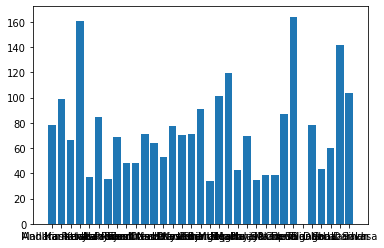

In [41]:
import matplotlib.pyplot as plt
plt.bar(final_states, statewise)
plt.show

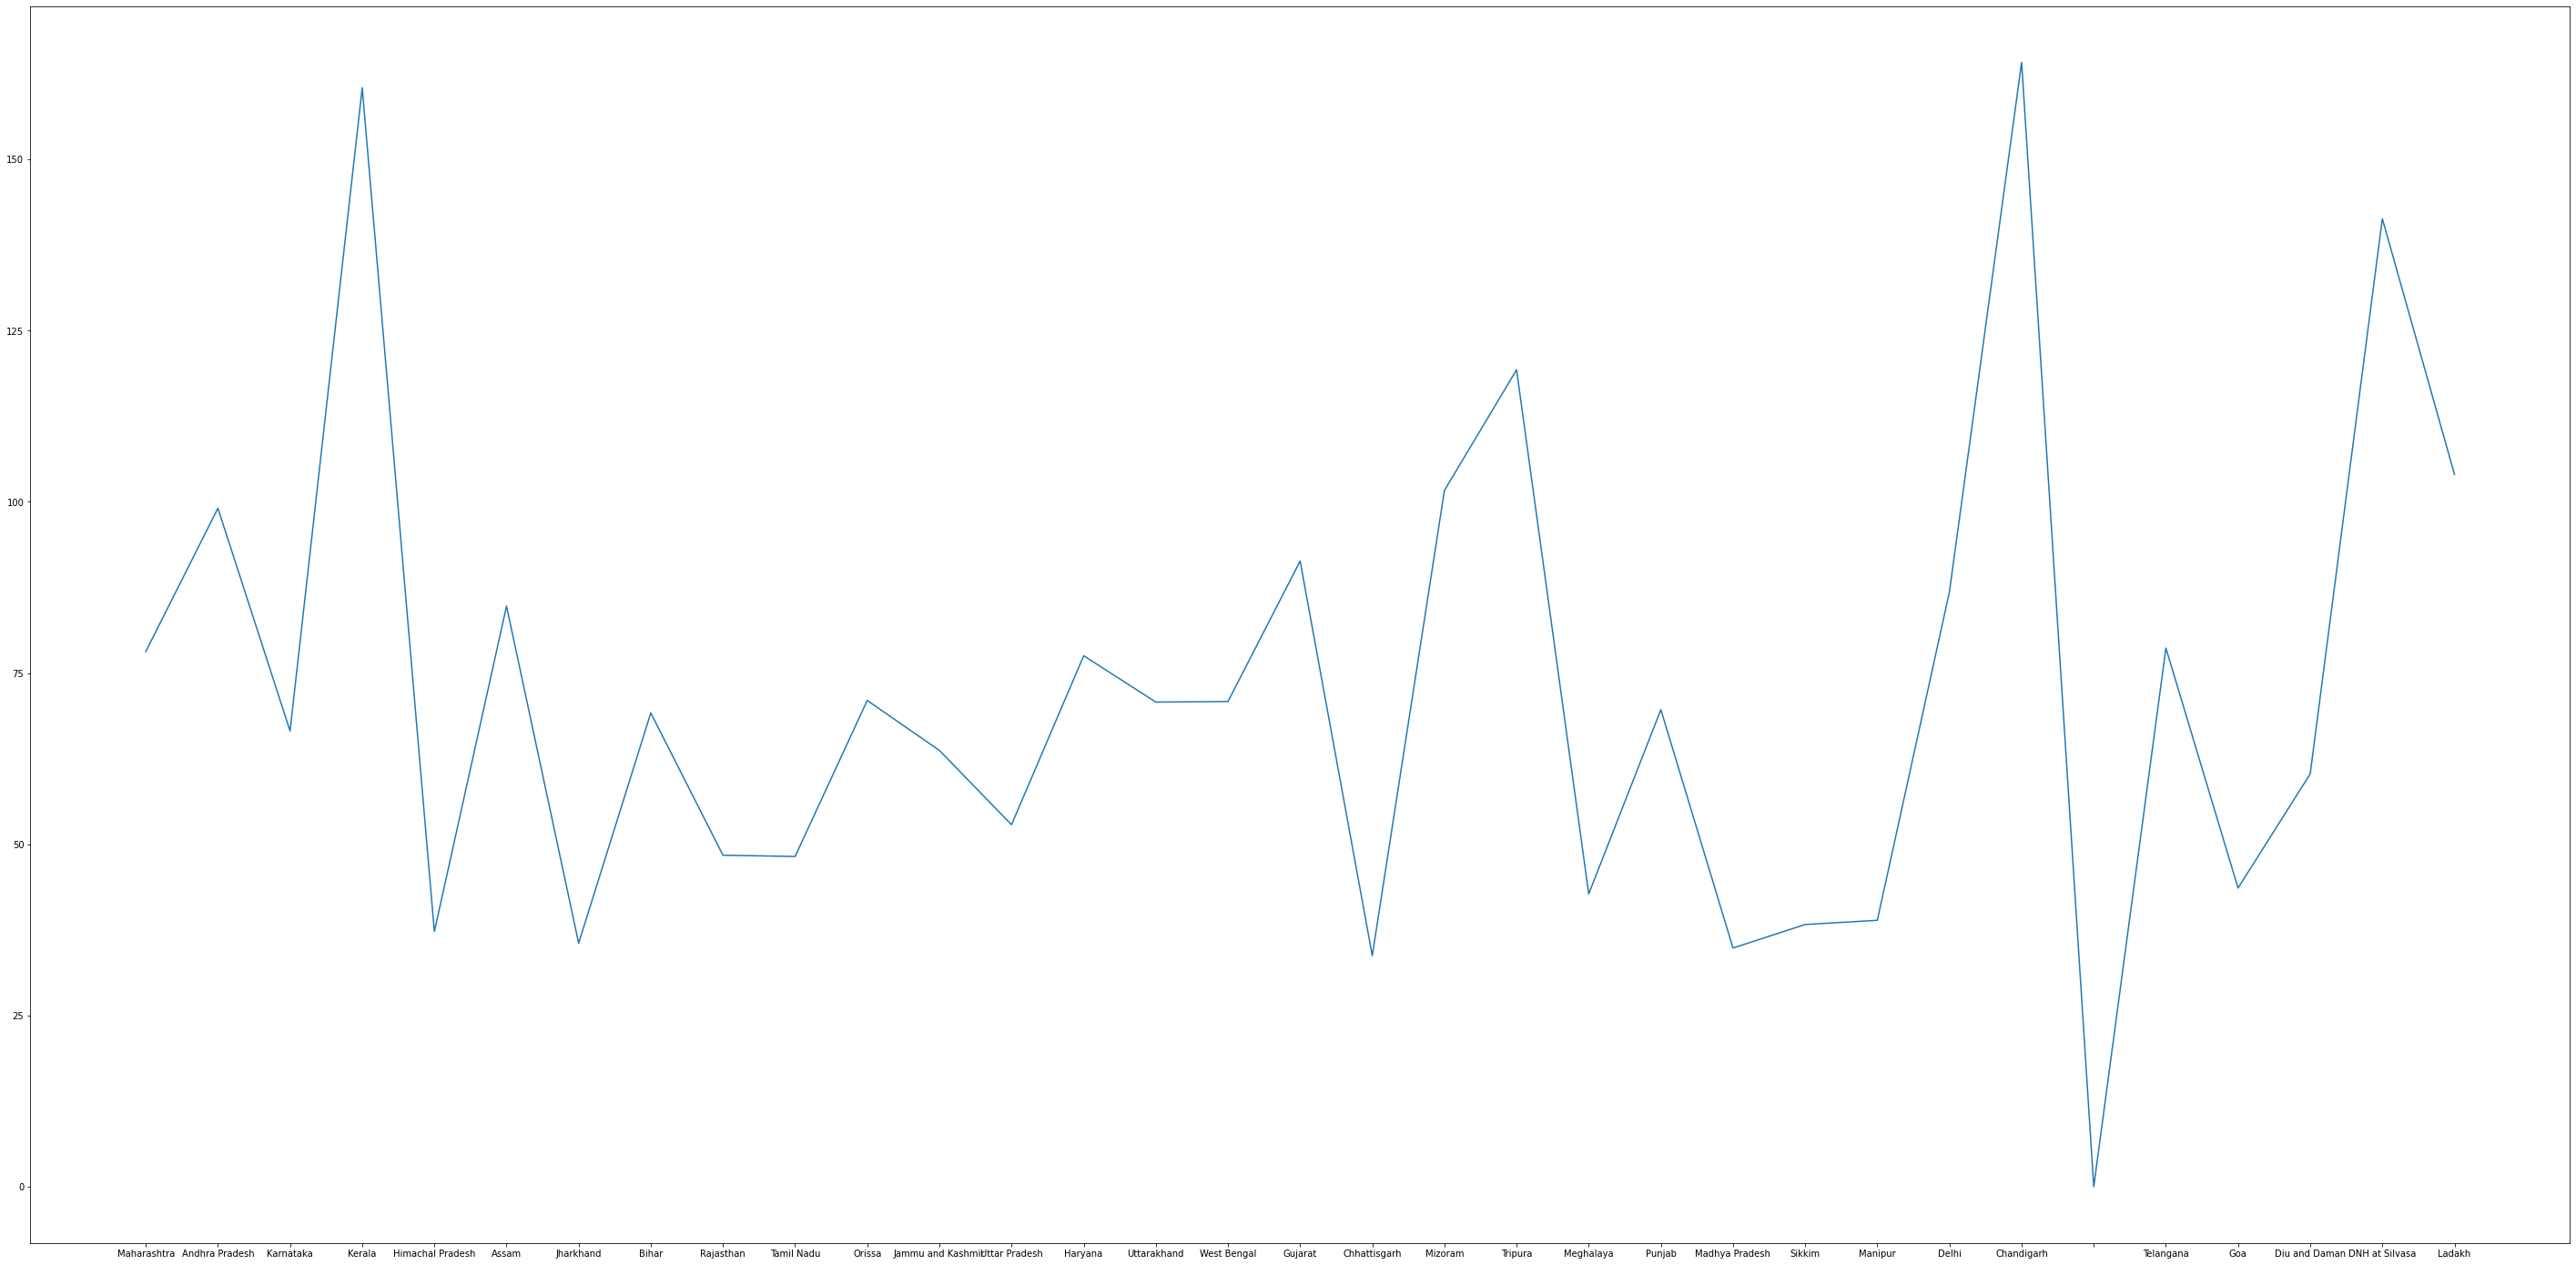

In [45]:
plt.figure(figsize=(50, 25))
display(plt.plot(final_states, statewise))